# Semantic segmentation of car image into car parts
This python notebook is part of the project hand-in that aims at creating a deep learning model which can successfully segment different car parts given an image of a car. All the data manipulation, model development, predictions and subsequent visualisations are present in this notebook. All visualisations and tabular information in the report have been sourced from this notebook. 
 
Semantic segmentation, a key task in the field of computer
vision with numerous practical applications, was studied in
this project. The key routines that enable the segmentation of
pixels into the right classes require that the model is able to
successfully incorporate spatial information into the training.
The high-level details of the image should be captured by way
of various feature maps and image pooling. The model should
then be able to reproduce the image as closely as possible
to the original image, and the error between the reproduced
image and the original image is expected to be minimized
through the epochs.

# Preparation of the packages 
The first step is just to initialize python package that are used through out the project. 

In [ ]:
# this package needs to be install everytime, as it is currently being run on google colab. 
!pip install segmentation_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import segmentation_models as sm
import glob
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import keras 
import time
import pandas as pd
from keras.utils import normalize
from tensorflow.keras import layers
import cv2
import skimage
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical # one hot encoding 
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2D,Conv2DTranspose,Input,Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import normalize
from keras.metrics import MeanIoU
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_score

Segmentation Models: using `keras` framework.


# Preparing colab
This section will prepare the google colab document. 

cd is used to go to the folder where the data is stored, cd must by in it's only line of code in order to go to the path

In [ ]:
# Allowing google colab to access my drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive/Colab\ Notebooks/Deep\ Learning/Project/

/content/drive/.shortcut-targets-by-id/1w2GtSz6-YbCNhEveUnB1FUa98VSIca5E/Colab Notebooks/Deep Learning/Project


# Data load and instructions for execution
Here the data for the project is loaded. A list with the test images are created as well as one for the real images. 
 The data is then prepped for the model in order to avoid and shape errors or other complications.If the project is run using the data shared on github the two list that are commented out should be uncommented and the list that are not commented out should be. \
***Note***: If the code has to be run, not using the entire dataset, these list may need modification.

The data for this study was provided by Deloitte and consisted of real images as well as augmented images of car parts produced by Deloitte. The images contained both the car's image and their corresponding class labels represented as masks. The total size of the dataset was 168 real images and 3491 augmented images. Apart from that, 30 test images were also provided to use for testing the final architecture. Only the clean data was used for this project

In [ ]:

npy_list = os.listdir('data/clean_data') #path for clean data
test_list = ['.git','0_a.npy', '1_a.npy', '2_a.npy', '3_a.npy', '5_a.npy', '6_a.npy', '10_a.npy', '11_a.npy', 
             '12_a.npy', '19_a.npy', '20_a.npy', '21_a.npy', '22_a.npy', '24_a.npy', '26_a.npy', '28_a.npy',
             '29_a.npy', '32_a.npy', '33_a.npy', '35_a.npy', '36_a.npy', '39_a.npy', '40_a.npy', '43_a.npy', 
             '45_a.npy', '46_a.npy', '47_a.npy', '50_a.npy', '51_a.npy', '52_a.npy']              #Comment out if only data from github is available
#The train list only contains the images that are real images
train_list = ['0.npy','102_a.npy','103.npy','104_a.npy','108.npy','10_a.npy','112_a.npy','113_a.npy','114.npy',
              '114_a.npy','116.npy','11_a.npy','12.npy','120.npy','120_a.npy','121.npy','121_a.npy','124_a.npy',
              '125_a.npy','12_a.npy','13.npy','130.npy','137_a.npy','141_a.npy','147.npy','15.npy','153_a.npy',
              '156_a.npy','158.npy','158_a.npy','16.npy','180.npy','182.npy','192.npy','193.npy','199_a.npy',
              '19_a.npy','1_a.npy','201.npy','209.npy','20_a.npy','211.npy','21_a.npy','224.npy','224_a.npy',
              '22_a.npy','237.npy','241.npy','249_a.npy','24_a.npy','259.npy','26.npy','26_a.npy','272.npy',
              '281_a.npy','283_a.npy','285_a.npy','28_a.npy','29.npy','290.npy','29_a.npy','2_a.npy','301.npy',
              '308.npy','31.npy','312_a.npy','313.npy','32.npy','32_a.npy','33.npy','331.npy','334_a.npy','33_a.npy',
              '34.npy','341_a.npy','351_a.npy','353_a.npy','35_a.npy','361.npy','363_a.npy','36_a.npy','37.npy',
              '379_a.npy','38.npy','381_a.npy','39.npy','399_a.npy','39_a.npy','3_a.npy','409_a.npy','40_a.npy',
              '41.npy','412.npy','417_a.npy','42.npy','428_a.npy','43_a.npy','44.npy','45.npy','455.npy','45_a.npy',
              '46_a.npy','471.npy','475.npy','47_a.npy','493.npy','499.npy','5.npy','50_a.npy','518.npy','519_a.npy',
              '51_a.npy','52_a.npy','535_a.npy','536.npy','54.npy','54_a.npy','557_a.npy','57.npy','57_a.npy','582_a.npy',
              '59.npy','5_a.npy','606_a.npy','60_a.npy','62.npy','62_a.npy','64.npy','64_a.npy','65_a.npy','66.npy',
              '664_a.npy','66_a.npy','68_a.npy','69.npy','699_a.npy','6_a.npy','7.npy','700_a.npy','706_a.npy','71_a.npy',
              '724_a.npy','72_a.npy','73.npy','73_a.npy','74.npy','74_a.npy','75_a.npy','773_a.npy','78_a.npy','795_a.npy',
              '798_a.npy','79_a.npy','8.npy','801_a.npy','816_a.npy','82.npy','83_a.npy','84.npy','85.npy','855_a.npy',
              '86_a.npy','87_a.npy','9.npy','93.npy','94_a.npy','95_a.npy','99_a.npy']                #Comment out if only data from github is available

#Here are the list that should be used if not the whole dataset is available 
#test_list = ['.git','0_a.npy', '1_a.npy', '2_a.npy', '10_a.npy', '20_a.npy', '24_a.npy','26_a.npy']  #uncomment to run with data from github 
#train_list = ['39_a.npy', '83_a.npy', '94_a.npy', '428_a.npy','417_a.npy', '59.npy','16.npy',
#              '137_a.npy','272.npy','12.npy','57.npy','706_a.npy','361.npy','193.npy','8.npy' ]      #uncomment to run with data from github

npy_list_no_augmentation = [i for i in npy_list if i in train_list]

#npy_list is the list of files that include the real images as well as the augmented images
npy_list = [i for i in npy_list if i not in test_list]
npy_list = [i for i in npy_list if i != '.ipynb_checkpoints' ]
npy_list = [i for i in npy_list if i != '.DS_Store']
npy_list = [i for i in npy_list if i != 'car_data'] 
test_list = [i for i in test_list if i != '.git']
print("Length of train and test with the augmented data:", len(npy_list),len(test_list))
print("Length of train without the augmented data:      ", len(npy_list_no_augmentation))

Length of train and test with the augmented data: 3491 30
Length of train without the augmented data:       168


In [ ]:
'''
Below function is used to read the image files and reshape them and append them into a dataset. One hot encoding is performed on the label mask. The function returns one dataset containing the 
training data, one dataset containing the label encoded mask and the another dataset containing one hot encoded mask.

Below function is used to read the image files and reshape them and append them into a dataset. 
One hot encoding is performed on the label mask. The function returns one dataset containing the 
training data, one dataset containing the label encoded mask and another dataset containing one hot encoded mask.
'''

# loading training data

file_list = npy_list
def prep_for_model(file_path,file_list):
    list_holding_img = []
    list_holding_mask = []
    for i in file_list:
        seg = np.load(file_path+i)
        seg_rgb = seg[0:3,:,:] # *3*256*256
        seg_rgb= seg_rgb.transpose((1,2,0)) # 256*256*3
        list_holding_img.append(seg_rgb)
    
        mask = seg[3,:,:].reshape(1,seg.shape[1],seg.shape[2]) # taking the last layer and reshaping to 1*256*256
        mask = mask.transpose((1,2,0)) #256*256*1
        list_holding_mask.append(mask)
#     convert list to numpy array
    X_train = np.array(list_holding_img)
    print("X shape:",X_train.shape)
    
    y_train = np.array(list_holding_mask)
    print(y_train.shape)
    y_train = np.squeeze(y_train, axis=(3,))
    print(y_train.shape)

    #splitting it to make a smaller dataset
    
    X_train_keep = X_train[:len(file_list),:,:,:]
    y_train_keep = y_train[:len(file_list),:,:]
    print("X_train_keep:", X_train_keep.shape, "\ny_train_keep: ",y_train_keep.shape)


    labelencoder = LabelEncoder()
    n, h, w = y_train_keep.shape
    print("n,h,w:",n,h,w)
    y_train_reshaped = y_train_keep.reshape(-1,1)
    y_train_reshaped_encoded = labelencoder.fit_transform(y_train_reshaped)
    y_train_encoded_original_shape = y_train_reshaped_encoded.reshape(n, h, w)
    n_classes = len(np.unique(y_train_encoded_original_shape))


    y_train_cat = to_categorical(y_train_encoded_original_shape, num_classes=n_classes)
    y_train_cat = y_train_cat.reshape((y_train_keep.shape[0], y_train_keep.shape[1], y_train_keep.shape[2], n_classes))
    print('y_train_cat.shape: ',y_train_cat.shape)
    
    return X_train_keep,y_train_keep, y_train_cat # training dataset, y_train with label encoded mask , y_train with one hot encoded mask

### Creating the dataset

Here 3 different datasets will created 2 training datasets, 1 without data augmentation and 1 with. Lastly a test dataset is created. 

In [ ]:
# Creating the training dataset without augmentation 
file_path ="data/clean_data/"
x_train_no_augmentation,y_train_no_augmentation, y_train_cat_no_augmentation = prep_for_model(file_path,npy_list_no_augmentation)
# Creating the training dataset with augmentation 
x_train,y_train, y_train_cat = prep_for_model(file_path,npy_list)
# Creating the test dataset
x_test, y_test, y_test_cat = prep_for_model(file_path,test_list)

X shape: (168, 256, 256, 3)
(168, 256, 256, 1)
(168, 256, 256)
X_train_keep: (168, 256, 256, 3) 
y_train_keep:  (168, 256, 256)
n,h,w: 168 256 256


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


y_train_cat.shape:  (168, 256, 256, 9)
X shape: (3491, 256, 256, 3)
(3491, 256, 256, 1)
(3491, 256, 256)
X_train_keep: (3491, 256, 256, 3) 
y_train_keep:  (3491, 256, 256)
n,h,w: 3491 256 256
y_train_cat.shape:  (3491, 256, 256, 9)
X shape: (30, 256, 256, 3)
(30, 256, 256, 1)
(30, 256, 256)
X_train_keep: (30, 256, 256, 3) 
y_train_keep:  (30, 256, 256)
n,h,w: 30 256 256
y_train_cat.shape:  (30, 256, 256, 9)


# U-Net without skip connection

The U-Net without skip connection is created as a baseline model for the project. 

For this mode the input is passed through an encoder module consisting of convolution layers, max pool, and downsampling followed by a decoder with upsampling layers. The encoder projects the image onto a lower feature space while the decoder reconstructs the image using interpolation methods and improves through successive epochs. Max pooling is introduced in between the convolutions to prevent overfitting. Weight initialization was performed through the He normal initializer to prevent exploding or vanishing gradients.

The model is the trained on 3 folds, and the F1 score for each layer is calculated. The F1 score for the test dataset is then also calculated. 

Last the predicted masked created from the model is shown. 

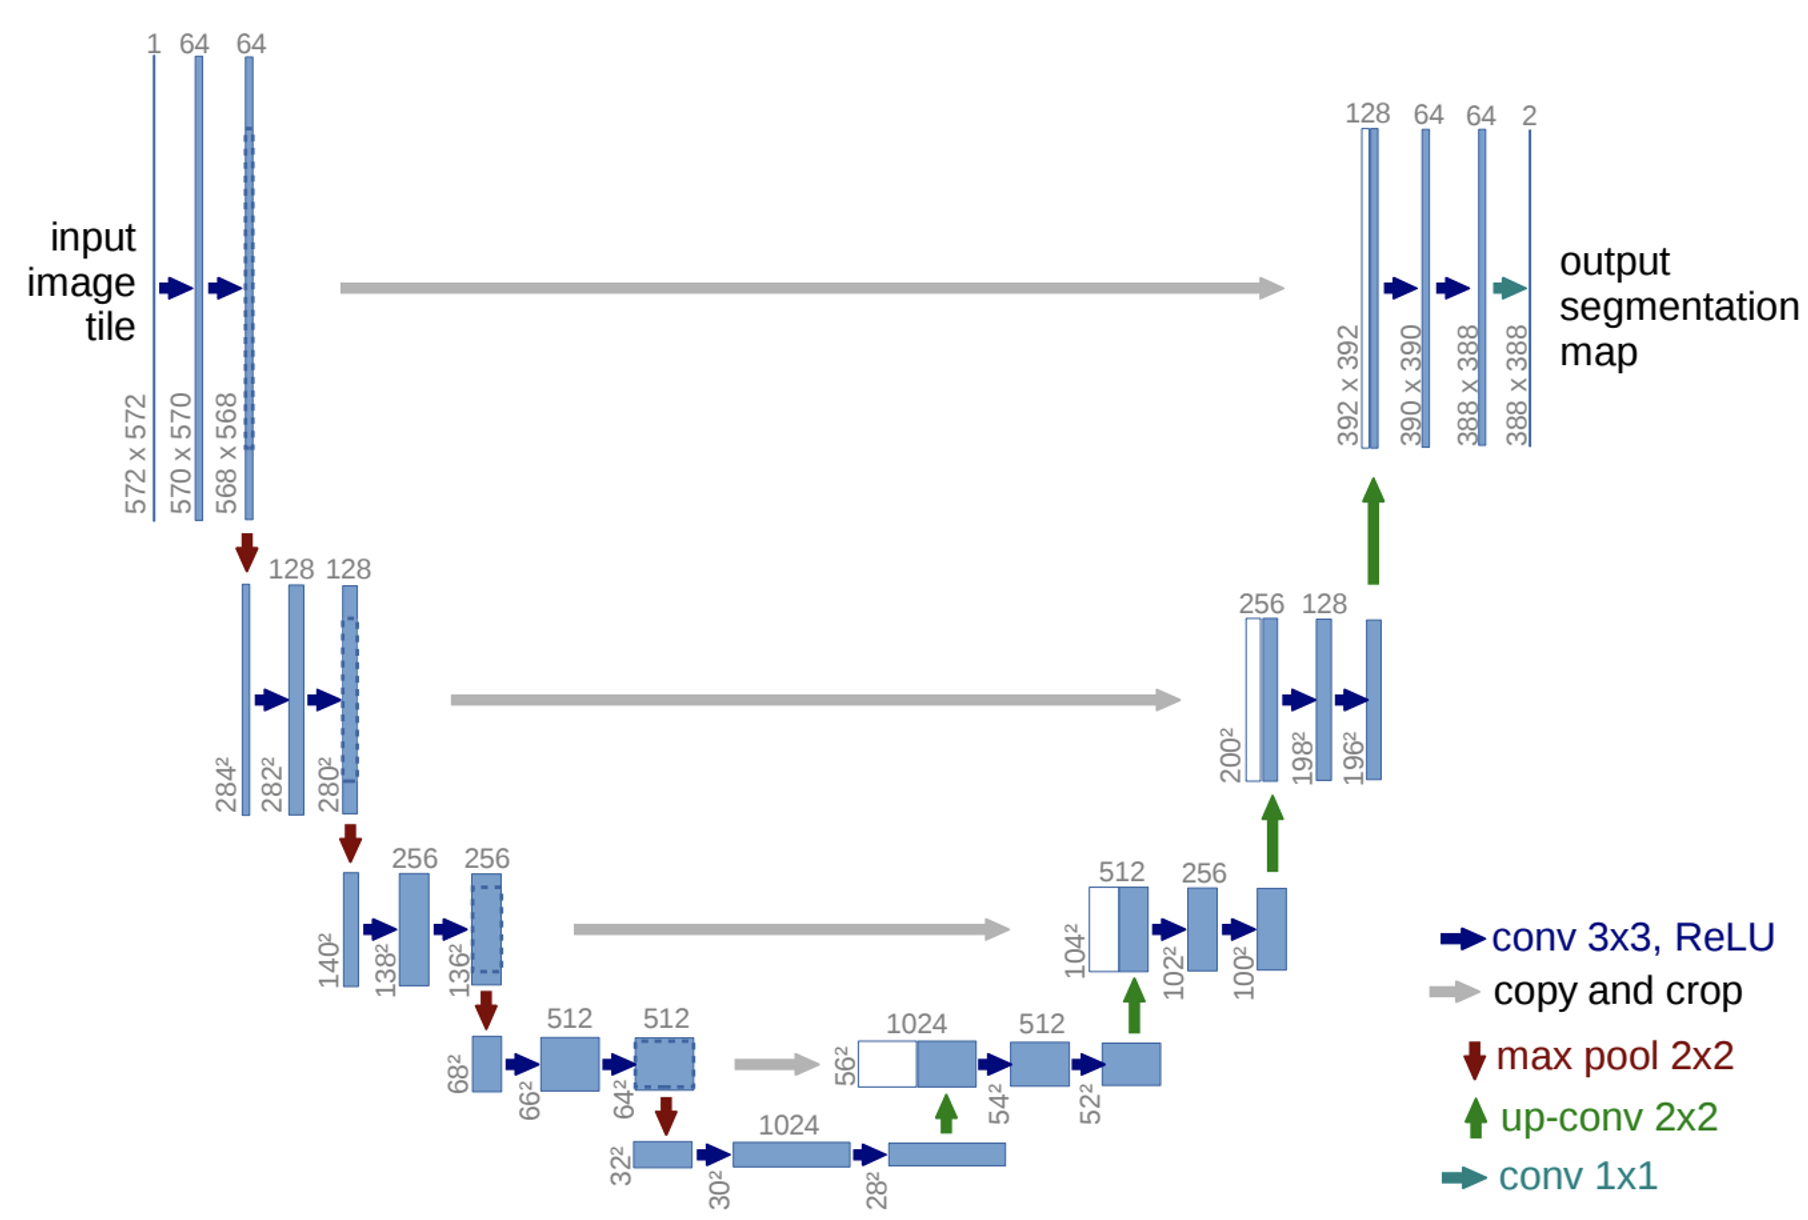

In [ ]:
'''
First model for semantic segmentation. The model architecture for U-net with no skip connection is created.
'''

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3
 
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)
 
#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)
 
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
 
#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
# u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
# u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
# u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
# u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = tf.keras.layers.Conv2D(9, (1, 1), activation='softmax')(c9)

LR = 0.001
optim = keras.optimizers.Adam(LR)

model_cnn = tf.keras.Model(inputs=[inputs], outputs=[outputs])
metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]
model_cnn.compile(optimizer=optim, loss='categorical_crossentropy', metrics=metrics)
model_cnn.summary()
 
# The belwow if for k fold cross validation 
num_folds = 3
batch_size = 8
epochs = 25
 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 lambda (Lambda)             (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 dropout (Dropout)           (None, 256, 256, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                             

In [ ]:
'''
The U-Net model with no skip connection is executed, using a 3 fold. 
The IOU and F1 score for the validation set is printed at the end of each fold.  
'''

# a start time is defined in order to check the computational time of the k fold
st = time.time()
# Here the kfold is created into 3 splits, creating training and validation sets
kfold = KFold(n_splits=num_folds, shuffle=True)
 
fold_no = 1
for train, test in kfold.split(x_train, y_train_cat):
  print("------------------------------------------------------------------------")
  print("Training for fold:", fold_no)
  model_cnn = tf.keras.Model(inputs=[inputs], outputs=[outputs])
  model_cnn.compile(optimizer=optim, loss='categorical_crossentropy', metrics=metrics)
  history_cnn=model_cnn.fit(x_train[train], 
                        y_train_cat[train], 
                        epochs=epochs, 
                        validation_data=(x_train[test], y_train_cat[test]))
  #this will calculate the f1 score for each fold 
  scores = model_cnn.evaluate(x_train[test], y_train_cat[test])
  print(f'Score for fold {fold_no}: {model_cnn.metrics_names[2]} of {scores[2]}; {model_cnn.metrics_names[3]} of {scores[3]}')
  # Increase fold number and continue loop
  fold_no = fold_no + 1
 

# and end time is defined and the final computational time is calculated
et = time.time()
print("Execution time: {}".format(et-st))

------------------------------------------------------------------------
Training for fold: 1
Epoch 1/25
73/73 [==============================] - 19s 163ms/step - loss: 0.9620 - accuracy: 0.8338 - iou_score: 0.0763 - f1-score: 0.0835 - val_loss: 0.5675 - val_accuracy: 0.8838 - val_iou_score: 0.1879 - val_f1-score: 0.1940
Epoch 2/25
73/73 [==============================] - 7s 98ms/step - loss: 0.5386 - accuracy: 0.8835 - iou_score: 0.0981 - f1-score: 0.1042 - val_loss: 0.5764 - val_accuracy: 0.8838 - val_iou_score: 0.1882 - val_f1-score: 0.1942
Epoch 3/25
73/73 [==============================] - 7s 98ms/step - loss: 0.5150 - accuracy: 0.8835 - iou_score: 0.0981 - f1-score: 0.1042 - val_loss: 0.5237 - val_accuracy: 0.8838 - val_iou_score: 0.1886 - val_f1-score: 0.1945
Epoch 4/25
73/73 [==============================] - 7s 98ms/step - loss: 0.4929 - accuracy: 0.8835 - iou_score: 0.0984 - f1-score: 0.1044 - val_loss: 0.5035 - val_accuracy: 0.8838 - val_iou_score: 0.1889 - val_f1-score: 0.1

In [ ]:
#F1 score for the test images that were given for the model

y_pred1 = model_cnn.predict(x_test)
y_pred1_cnn = np.argmax(y_pred1,axis=3)
y_truth_cnn = np.argmax(y_test_cat,axis=3)
f1_matrix_cnn = []
for i in range(30):
    pred_cnn = y_pred1_cnn[i,:,:].reshape(y_pred1_cnn.shape[1]*y_pred1_cnn.shape[2])
    truth_cnn = y_truth_cnn[i,:,:].reshape(y_truth_cnn.shape[1]*y_truth_cnn.shape[2])
    f1_matrix_cnn.append(f1_score(pred_cnn,truth_cnn,average='macro' ))
print("F1-score for CNN for the given test images",round(np.mean(f1_matrix_cnn),3))


1/1 [==============================] - 0s 31ms/step
F1-score for CNN for the given test images 0.448


From the results, it appears that the training F1 score is high, but with a drastic fall for the test F1 score, which indicates overfitting. The accuracy of each class is calculated in order to investigate any effect on the model accuracy. This is calculated on the validation set in the last fold. The validation set contain 1.163 images. 

In [ ]:
# The accuracy for each class here is calculated using a confusion matrix.
y_true = np.argmax(y_train_cat[test], axis=3) #test is the validation set from the last fold
y_true = y_true.flatten()
y_pred = model_cnn.predict(x_train[test])     #test is tthe validation set from the last fold
y_pred = np.argmax(y_pred, axis=3)
y_pred = y_pred.flatten()
confusion = multilabel_confusion_matrix(y_true, y_pred, labels=[0,1,2,3,4,5,6,7,8])
for i in range(9):
  tn, fp, fn, tp = confusion[i].ravel()
  print("Class",i,": Accuracy ::",round(((tn+tp)/(tn+fp+fn+tp)*100),2))

37/37 [==============================] - 1s 22ms/step
Class 0 : Accuracy :: 97.86
Class 1 : Accuracy :: 99.5
Class 2 : Accuracy :: 99.83
Class 3 : Accuracy :: 99.8
Class 4 : Accuracy :: 99.54
Class 5 : Accuracy :: 99.64
Class 6 : Accuracy :: 99.75
Class 7 : Accuracy :: 99.59
Class 8 : Accuracy :: 99.74


The class wise accuracies are more or less in line for the validation dataset which indicates that the class imbalances are not impacting the overall model accuracies. The class wise accurcies are also calculated on the test dataset (30 images) for the sake of exhaustiveness. 

In [ ]:
#The accuracy for each class is once again calculated but for the test data set 
y_true = np.argmax(y_test_cat, axis=3)
y_true = y_true.flatten()
y_pred = model_cnn.predict(x_test)
y_pred = np.argmax(y_pred, axis=3)
y_pred = y_pred.flatten()
confusion = multilabel_confusion_matrix(y_true, y_pred, labels=[0,1,2,3,4,5,6,7,8])
for i in range(9):
  tn, fp, fn, tp = confusion[i].ravel()
  print("Class",i,": Accuracy ::",round(((tn+tp)/(tn+fp+fn+tp)*100),2))

1/1 [==============================] - 0s 33ms/step
Class 0 : Accuracy :: 89.06
Class 1 : Accuracy :: 97.88
Class 2 : Accuracy :: 98.29
Class 3 : Accuracy :: 98.72
Class 4 : Accuracy :: 97.46
Class 5 : Accuracy :: 97.01
Class 6 : Accuracy :: 97.61
Class 7 : Accuracy :: 98.23
Class 8 : Accuracy :: 98.76


The class wise accuracies are more or less consistent, however there is a slight decrease in the background (class 0) accuracy. The model is run again with the test data set as validation in order to see the progression for each epoch. It is noteworthy that the validation set does not impact the performance of the model, it is purely a measurment of the performance of the model at the end of each epoch. 

Epoch 1/25
291/291 [==============================] - 9s 26ms/step - loss: 0.1356 - accuracy: 0.9570 - iou_score: 0.6271 - f1-score: 0.7451 - val_loss: 0.6583 - val_accuracy: 0.8368 - val_iou_score: 0.2536 - val_f1-score: 0.3539
Epoch 2/25
291/291 [==============================] - 7s 24ms/step - loss: 0.1107 - accuracy: 0.9629 - iou_score: 0.6779 - f1-score: 0.7938 - val_loss: 0.7395 - val_accuracy: 0.8497 - val_iou_score: 0.2955 - val_f1-score: 0.4081
Epoch 3/25
291/291 [==============================] - 7s 24ms/step - loss: 0.0924 - accuracy: 0.9676 - iou_score: 0.7198 - f1-score: 0.8263 - val_loss: 0.7593 - val_accuracy: 0.8454 - val_iou_score: 0.2955 - val_f1-score: 0.4108
Epoch 4/25
291/291 [==============================] - 7s 24ms/step - loss: 0.0824 - accuracy: 0.9702 - iou_score: 0.7430 - f1-score: 0.8442 - val_loss: 0.8188 - val_accuracy: 0.8516 - val_iou_score: 0.3133 - val_f1-score: 0.4315
Epoch 5/25
291/291 [==============================] - 7s 24ms/step - loss: 0.0807 - 

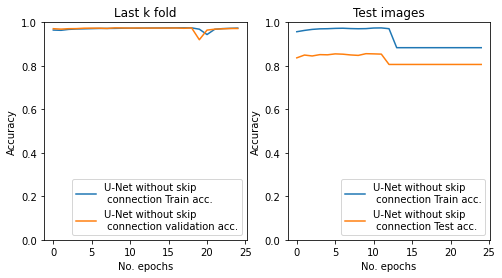

In [ ]:
model_cnn.compile(optimizer=optim, loss='categorical_crossentropy', metrics=metrics)
history_cnn_test =model_cnn.fit(x_train[train], y_train_cat[train], batch_size=8, 
            epochs=25,verbose=1,
            validation_data=(x_test, y_test_cat))
# Subplots comparing the accuracy for the validation set (from the last k fold) and the test set
fig,axs = plt.subplots(1,2,figsize=(10,4))
axs = axs.flatten()
axs[0].plot(history_cnn.history['accuracy'])
axs[0].plot(history_cnn.history['val_accuracy'])
axs[0].set_ylim([0, 1])
axs[0].set_title("Last k fold")
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('No. epochs')
axs[0].legend(["U-Net without skip \n connection Train acc.", "U-Net without skip \n connection validation acc."], loc ="lower right")

axs[1].plot(history_cnn_test.history['accuracy'])
axs[1].plot(history_cnn_test.history['val_accuracy'])
axs[1].set_title("Test images")
axs[1].set_ylim([0, 1])
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('No. epochs')
axs[1].legend(["U-Net without skip \n connection Train acc.", "U-Net without skip \n connection Test acc."], loc ="lower right")
#plt.savefig("CNN_accuracy_combined.png")
plt.show()

From the plots, it can be seen that the test accuracy is not as high as for the validation accuracy, which indicates that the model is overfitting. The occasional dips in the plots across the epochs may be caused due to any image(s) or class(es) that the model fails to segment or classify correctly. The accuracy ratio is sensitive to such anomalies as there are only 30 images in the test set.

In order visualize how the model has performed with it's predicted mask, a plot with the image, the observed mask, and the predicted mask is shown below. 

(30, 256, 256, 3)
1/1 [==============================] - 0s 31ms/step


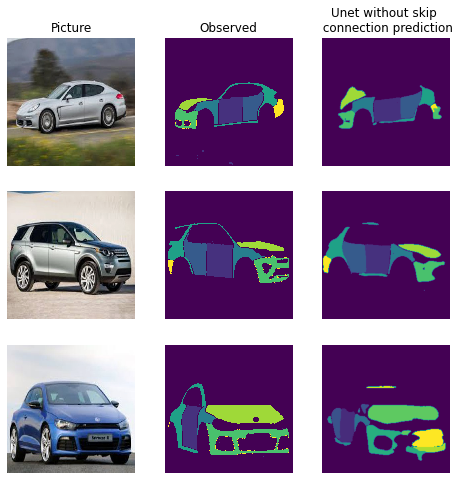

In [ ]:
#The mask prediction created by the unet without skip connection is shown, along with the ground truth and the real images
print(x_test.shape)

y_pred_cnn = model_cnn.predict(x_test)
y_pred1_cnn = np.argmax(y_pred_cnn,axis=3)

fig,axs = plt.subplots(3,3,figsize=(8,8))
axs = axs.flatten()
axs[0].imshow(x_test[0],interpolation='nearest')
axs[0].set_title("Picture")
axs[0].axis('off')
axs[1].imshow(y_test[0,:,:],interpolation='nearest')
axs[1].set_title("Observed")
axs[1].axis('off')
axs[2].imshow(y_pred1_cnn[0,:,:])
axs[2].set_title("Unet without skip \n connection prediction")
axs[2].axis('off')

axs[3].imshow(x_test[5],interpolation='nearest')
axs[3].axis('off')
axs[4].imshow(y_test[5,:,:],interpolation='nearest')
axs[4].axis('off')
axs[5].imshow(y_pred1_cnn[5,:,:])
axs[5].axis('off')

axs[6].imshow(x_test[4],interpolation='nearest')
axs[6].axis('off')
axs[7].imshow(y_test[4,:,:],interpolation='nearest')
axs[7].axis('off')
axs[8].imshow(y_pred1_cnn[4,:,:])
axs[8].axis('off')


#plt.savefig("CNN_mask.png")
plt.axis('off')
plt.show()

The predicted masks predict comparatively well for classes that have higher areas but fall short of identifying the thinner frames such as the top part of the car doors (above the windows). This may be attributed to the absence of skip connections which is causing a considerable loss of information between the contraction and the expansion paths. As a result of this, the reconstruction capability of the decoder part is not performing to its full potential.

# U-Net with skip connection

The second architecture that was experimented with was the U-net architecture including the skip connections. The key element in this architecture is the concatenation of higher-resolution feature maps from the encoder network with the upsampled features, allowing for better representation learning with subsequent convolutions. In other words, the exchange of information between the contraction and the expansion path is expected to help the decoder path with better reconstruction values. 

Transfer learning was deployed for faster training and higher accuracy. The pre-trained model VGG16 has been deployed in the encoder.

Once the model was implemeted the code was trained on a 3 fold cross validation, with the F1 score calculated between each fold based on the validation set. 

The F1 score is then also calculated on the test data set, and last the predticed mask created is shown along with the ground turth mask. 

In [ ]:
'''
Second model for semantic segmentation. The model architecture for U-net with skip connection is created.
'''

dim1 = 256
dim2 = 256
dim3 =   3
def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding='same')(input)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2,2),strides=2,padding='same')(input)
    x = Concatenate()([x, skip_features])
    x= conv_block(x, num_filters)
    return x

def build_vgg16_unet(input_shape):
    '''Input'''
    inputs =Input(input_shape)
    VGG16_unet = VGG16(include_top=False,weights="imagenet",input_tensor=inputs)
    """Encoder : Extracting skip connections"""
    s1 = VGG16_unet.get_layer("block1_conv2").output #256
    s2 = VGG16_unet.get_layer("block2_conv2").output #128
    s3 = VGG16_unet.get_layer("block3_conv3").output #64
    s4 = VGG16_unet.get_layer("block4_conv3").output #32
    
    #bridge
    b1 = VGG16_unet.get_layer("block5_conv3").output #16
    
    '''Decoder'''
    d1 = decoder_block(b1, s4, 256)
    d2 = decoder_block(d1, s3, 128)
    d3 = decoder_block(d2, s2, 64 )
    d4 = decoder_block(d3, s1, 32 )
    
    outputs = Conv2D(9,1,padding="same",activation="softmax")(d4)
    model = Model(inputs,outputs, name="VGG16UNET")
    return model

if __name__ == "__main__":
    input_shape = (dim1,dim2,dim3)
    model = build_vgg16_unet(input_shape)
    model.summary()
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "VGG16UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 256, 256, 64  36928       ['block1_conv1[0][0]']           
                                )                                                         

In [ ]:
'''
The U-Net model with skip connection is executed, using a 3 fold. 
The IOU and F1 score for the validation set is printed at the end of each fold.  
'''
st = time.time()
n_classes=9
activation='softmax'
LR = 0.001
optim = keras.optimizers.Adam(LR)
metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]
input_shape = (dim1,dim2,dim3)
model_vgg = build_vgg16_unet(input_shape)
num_folds = 3
kfold = KFold(n_splits=num_folds, shuffle=True)
 
fold_no = 1
for train, test in kfold.split(x_train, y_train_cat):
  print("------------------------------------------------------------------------")
  print("Training for fold:", fold_no)
  model_vgg.compile(optimizer=optim, loss='categorical_crossentropy', metrics=metrics)
  history_vgg =model_vgg.fit(x_train[train], 
                              y_train_cat[train],
                              batch_size=8, 
                              epochs=25,
                              verbose=1,
                              validation_data=(x_train[test], y_train_cat[test]))

  scores = model_vgg.evaluate(x_train[test], y_train_cat[test])
  print(f'Score for fold {fold_no}: {model_vgg.metrics_names[2]} of {scores[2]}; {model_vgg.metrics_names[3]} of {scores[3]}')
  fold_no = fold_no + 1

et = time.time()
print("Execution time: {}".format(et-st))

------------------------------------------------------------------------
Training for fold: 1
Epoch 1/25
291/291 [==============================] - 40s 87ms/step - loss: 0.6894 - accuracy: 0.8651 - iou_score: 0.0974 - f1-score: 0.1128 - val_loss: 0.5298 - val_accuracy: 0.8908 - val_iou_score: 0.2268 - val_f1-score: 0.2324
Epoch 2/25
291/291 [==============================] - 19s 66ms/step - loss: 0.3609 - accuracy: 0.9061 - iou_score: 0.1718 - f1-score: 0.2161 - val_loss: 0.4961 - val_accuracy: 0.8969 - val_iou_score: 0.2504 - val_f1-score: 0.2678
Epoch 3/25
291/291 [==============================] - 19s 66ms/step - loss: 0.2927 - accuracy: 0.9195 - iou_score: 0.2852 - f1-score: 0.3768 - val_loss: 0.4006 - val_accuracy: 0.9048 - val_iou_score: 0.2791 - val_f1-score: 0.3058
Epoch 4/25
291/291 [==============================] - 19s 66ms/step - loss: 0.2420 - accuracy: 0.9307 - iou_score: 0.3723 - f1-score: 0.4807 - val_loss: 0.2665 - val_accuracy: 0.9229 - val_iou_score: 0.3381 - val_f1-

In [ ]:
y_pred1 = model_vgg.predict(x_test)
y_pred1_unet = np.argmax(y_pred1,axis=3)
y_truth_unet = np.argmax(y_test_cat,axis=3)
f1_matrix_unet = []
for i in range(30):
    pred_unet = y_pred1_unet[i,:,:].reshape(y_pred1_unet.shape[1]*y_pred1_unet.shape[2])
    truth_unet = y_truth_unet[i,:,:].reshape(y_truth_unet.shape[1]*y_truth_unet.shape[2])
    f1_matrix_unet.append(f1_score(pred_unet,truth_unet,average='macro' ))
print("F1-score for Unet for the given test images",round(np.mean(f1_matrix_unet),3))

1/1 [==============================] - 3s 3s/step
F1-score for Unet for the given test images 0.47


From the results, it appears that the validation F1 score is high, whereas, the test F1 score has lowered, which indicates overfitting. However, it can also be seen that the F1 score for the U-Net with skip connection has slightly outperformed the U-Net without skip connection. 

Once again the accuracy of each class is calculated in order to investigate any effect on the model accuracy. This is calculated on the validation set in the last fold. The validation set contain 1.163 images.

In [ ]:
y_true = np.argmax(y_train_cat[test], axis=3)
y_true = y_true.flatten()
y_pred = model_vgg.predict(x_train[test])
y_pred = np.argmax(y_pred, axis=3)
y_pred = y_pred.flatten()
confusion = multilabel_confusion_matrix(y_true, y_pred, labels=[0,1,2,3,4,5,6,7,8])
for i in range(9):
  tn, fp, fn, tp = confusion[i].ravel()
  print("Class",i,": Accuracy ::",round(((tn+tp)/(tn+fp+fn+tp)*100),2))

37/37 [==============================] - 2s 47ms/step
Class 0 : Accuracy :: 98.81
Class 1 : Accuracy :: 99.72
Class 2 : Accuracy :: 99.92
Class 3 : Accuracy :: 99.89
Class 4 : Accuracy :: 99.78
Class 5 : Accuracy :: 99.83
Class 6 : Accuracy :: 99.85
Class 7 : Accuracy :: 99.76
Class 8 : Accuracy :: 99.88


The class wise accuracies are more or less in line for the validation dataset which indicates that the class imbalances are not impacting the overall model accuracies. The class wise accurcies are also calculated on the test dataset (30 images) for the sake of exhaustiveness.

In [ ]:
y_true = np.argmax(y_test_cat, axis=3)
y_true = y_true.flatten()
y_pred = model_vgg.predict(x_test)
y_pred = np.argmax(y_pred, axis=3)
y_pred = y_pred.flatten()
confusion = multilabel_confusion_matrix(y_true, y_pred, labels=[0,1,2,3,4,5,6,7,8])
for i in range(9):
  tn, fp, fn, tp = confusion[i].ravel()
  print("Class",i,": Accuracy ::",round(((tn+tp)/(tn+fp+fn+tp)*100),2))

1/1 [==============================] - 0s 37ms/step
Class 0 : Accuracy :: 91.74
Class 1 : Accuracy :: 97.98
Class 2 : Accuracy :: 98.49
Class 3 : Accuracy :: 98.61
Class 4 : Accuracy :: 97.62
Class 5 : Accuracy :: 97.64
Class 6 : Accuracy :: 97.96
Class 7 : Accuracy :: 97.8
Class 8 : Accuracy :: 98.29


The class wise accuracies are more or less consistent, however there is a slight decrease in the background (class 0) accuracy. The model is run again with the test data set as validation in order to see the progression for each epoch. It is noteworthy that the validation set does not impact the performance of the model, it is purely a measurment of the performance of the model at the end of each epoch.

In [ ]:
model_vgg.compile(optimizer=optim, loss='categorical_crossentropy', metrics=metrics)
history_vgg_test =model_vgg.fit(x_train, y_train_cat, batch_size=8, 
            epochs=25,verbose=1,
            validation_data=(x_test, y_test_cat))

Epoch 1/25
437/437 [==============================] - 39s 59ms/step - loss: 0.5076 - accuracy: 0.8887 - iou_score: 0.1487 - f1-score: 0.1824 - val_loss: 1.4140 - val_accuracy: 0.8080 - val_iou_score: 0.0945 - val_f1-score: 0.1072
Epoch 2/25
437/437 [==============================] - 23s 53ms/step - loss: 0.2749 - accuracy: 0.9237 - iou_score: 0.3146 - f1-score: 0.4046 - val_loss: 0.8948 - val_accuracy: 0.8133 - val_iou_score: 0.1192 - val_f1-score: 0.1485
Epoch 3/25
437/437 [==============================] - 23s 54ms/step - loss: 0.2017 - accuracy: 0.9403 - iou_score: 0.4456 - f1-score: 0.5573 - val_loss: 0.6484 - val_accuracy: 0.8123 - val_iou_score: 0.1582 - val_f1-score: 0.2122
Epoch 4/25
437/437 [==============================] - 23s 54ms/step - loss: 0.1530 - accuracy: 0.9523 - iou_score: 0.5346 - f1-score: 0.6516 - val_loss: 0.5648 - val_accuracy: 0.8387 - val_iou_score: 0.1938 - val_f1-score: 0.2609
Epoch 5/25
437/437 [==============================] - 23s 53ms/step - loss: 0.13

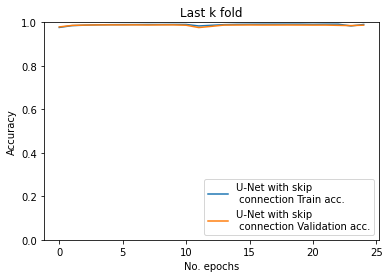

In [ ]:
#fig,axs = plt.subplots(1,1,figsize=(10,4))
#axs = axs.flatten()
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.ylim([0, 1])
plt.title("Last k fold")
plt.ylabel('Accuracy')
plt.xlabel('No. epochs')
plt.legend(["U-Net with skip \n connection Train acc.", "U-Net with skip \n connection Validation acc."], loc ="lower right")

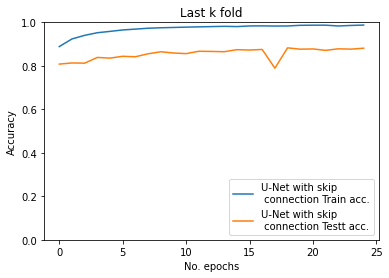

In [ ]:
#fig,axs = plt.subplots(1,1,figsize=(10,4))
#axs = axs.flatten()
plt.plot(history_vgg_test.history['accuracy'])
plt.plot(history_vgg_test.history['val_accuracy'])
plt.ylim([0, 1])
plt.title("Last k fold")
plt.ylabel('Accuracy')
plt.xlabel('No. epochs')
plt.legend(["U-Net with skip \n connection Train acc.", "U-Net with skip \n connection Testt acc."], loc ="lower right")

From the plots there is again signs of overfitting as the test accuracy never reaches the training accuracy. 

To once again visualize the predicted mask that the U-Net with skip connection can create, a plot with the image, the observed mask, and the predicted mask is created. 

(30, 256, 256, 3)
1/1 [==============================] - 0s 45ms/step


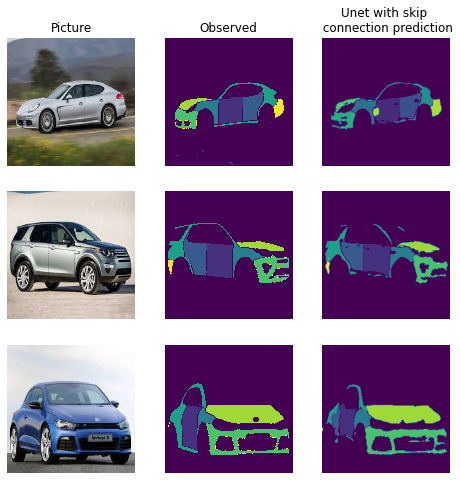

In [ ]:
y_pred_unet = model_vgg.predict(x_test)
y_pred1_unet = np.argmax(y_pred_unet,axis=3)


fig,axs = plt.subplots(3,3,figsize=(8,8))
axs = axs.flatten()
axs[0].imshow(x_test[0],interpolation='nearest')
axs[0].set_title("Picture")
axs[0].axis('off')
axs[1].imshow(y_test[0,:,:],interpolation='nearest')
axs[1].set_title("Observed")
axs[1].axis('off')
axs[2].imshow(y_pred1_unet[0,:,:])
axs[2].set_title("Unet with skip \n connection prediction")
axs[2].axis('off')

axs[3].imshow(x_test[5],interpolation='nearest')
axs[3].axis('off')
axs[4].imshow(y_test[5,:,:],interpolation='nearest')
axs[4].axis('off')
axs[5].imshow(y_pred1_unet[5,:,:])
axs[5].axis('off')

axs[6].imshow(x_test[4],interpolation='nearest')
axs[6].axis('off')
axs[7].imshow(y_test[4,:,:],interpolation='nearest')
axs[7].axis('off')
axs[8].imshow(y_pred1_unet[4,:,:])
axs[8].axis('off')


#plt.savefig("Unet_mask.png")
plt.axis('off')
plt.show()

It can be seen that the reconstruction of the thinner classes has improved which may be attributed to the concatenation of encoder and decoder layers.

# DEEPLABV3+ 

The architecture which also builds on the encoder-decoder structure for extracting high-level features and image reconstruction. The input image is passed through a spatial pyramid pooling convolution block that captures contextual information at different scales. It is simultaneously passed through a resnet50 encodeder, the output of which is concatenated with the output of the spacial pyramid pooling. This structure was inspired by the architecture of U-Net, as seen before, where layers of the encoder share information with the decoder 

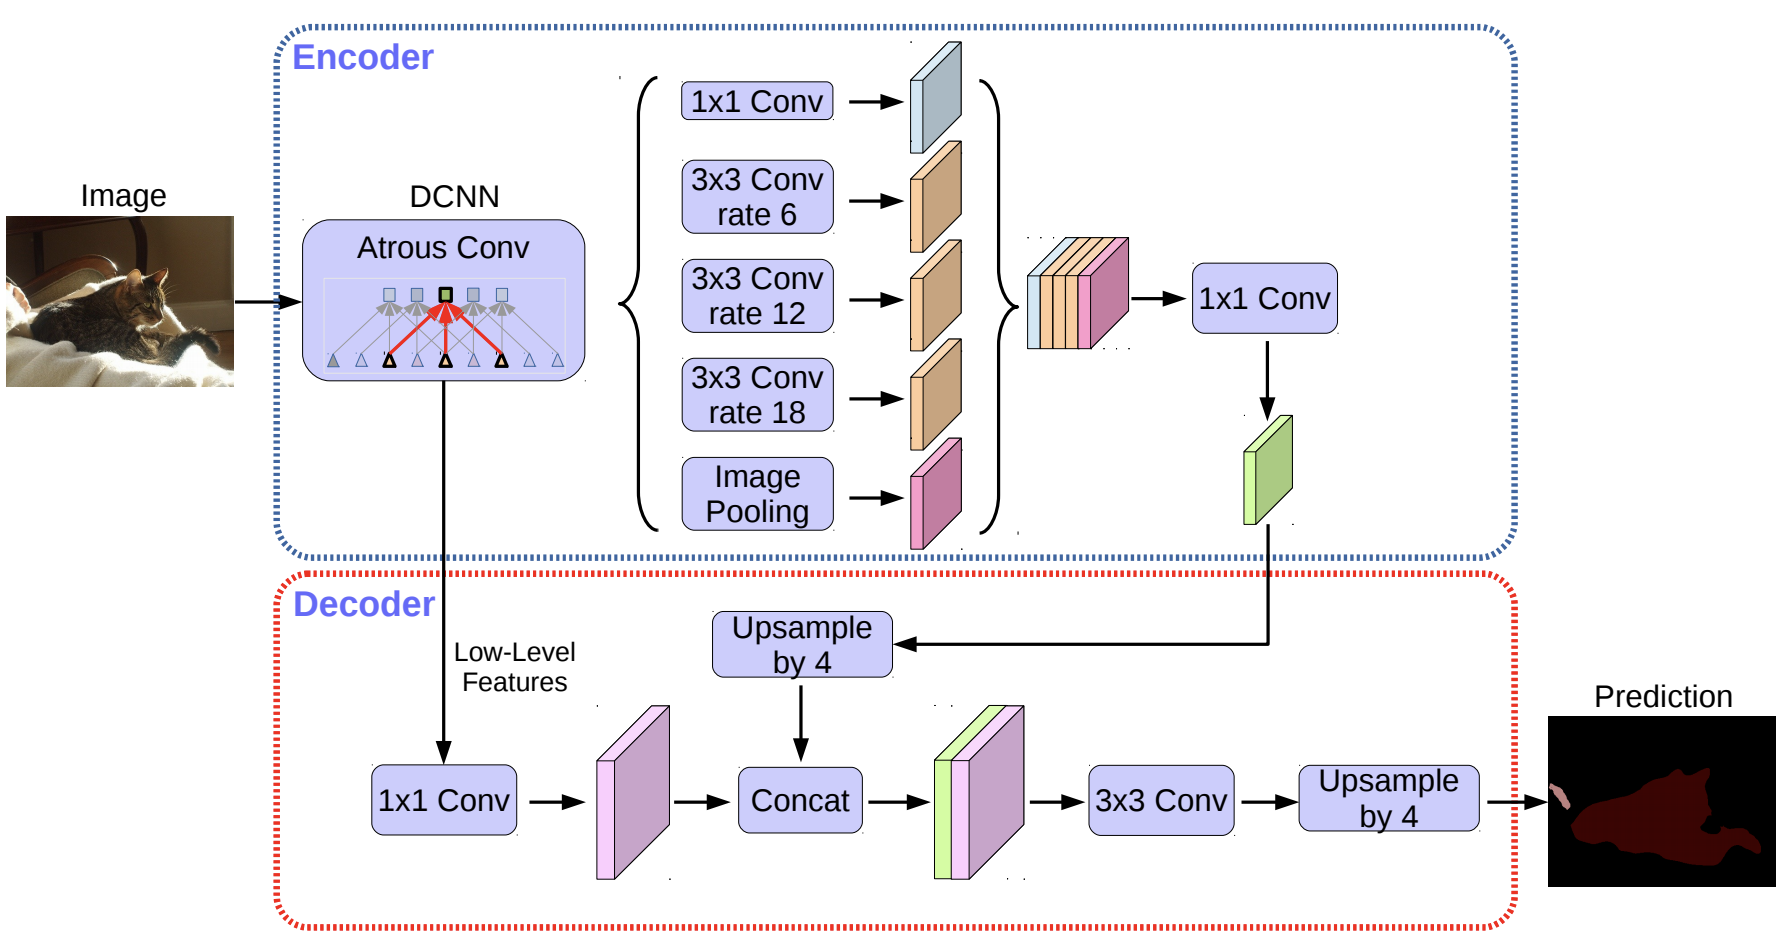

In [ ]:
'''
Third model for for semantic segmentation. The functions used for the model creation for DeepLabv3+ are created
'''
def convolution_block(
    block_input,
    num_filters=256,
    kernel_size=3,
    dilation_rate=1,
    padding="same",
    use_bias=False,
):
    x = layers.Conv2D(
        num_filters,
        kernel_size=kernel_size,
        dilation_rate=dilation_rate,
        padding="same",
        use_bias=use_bias,
        kernel_initializer=keras.initializers.HeNormal(),
    )(block_input)
    x = layers.BatchNormalization()(x)
    return tf.nn.relu(x)


def DilatedSpatialPyramidPooling(dspp_input):
    dims = dspp_input.shape
    x = layers.AveragePooling2D(pool_size=(dims[-3], dims[-2]))(dspp_input) # Not in the original paper
    x = convolution_block(x, kernel_size=1, use_bias=True)                  # Not in the original paper
    out_pool = layers.UpSampling2D(
        size=(dims[-3] // x.shape[1], dims[-2] // x.shape[2]), interpolation="bilinear",
    )(x)

    out_1 = convolution_block(dspp_input, kernel_size=1, dilation_rate=1)
    out_6 = convolution_block(dspp_input, kernel_size=3, dilation_rate=6)
    out_12 = convolution_block(dspp_input, kernel_size=3, dilation_rate=12)
    out_18 = convolution_block(dspp_input, kernel_size=3, dilation_rate=18)

    x = layers.Concatenate(axis=-1)([out_pool, out_1, out_6, out_12, out_18])
    output = convolution_block(x, kernel_size=1)
    return output


def DeeplabV3Plus(image_size, num_classes):
    model_input = keras.Input(shape=(image_size, image_size, 3))
    resnet50 = keras.applications.ResNet50(
        weights="imagenet", include_top=False, input_tensor=model_input
    )
    #resnet50 is used to get predetermined weights
    x = resnet50.get_layer("conv4_block6_2_relu").output
    x = DilatedSpatialPyramidPooling(x)
    input_a = layers.UpSampling2D(size=(4,4),interpolation="bilinear")(x)

    input_b = resnet50.get_layer("conv2_block3_2_relu").output
    input_b = convolution_block(input_b, num_filters=48, kernel_size=1)

    x = layers.Concatenate(axis=-1)([input_a, input_b])
    x = convolution_block(x)
    #x = convolution_block(x)  # An extra convolution block than from the paper
    x = layers.UpSampling2D(size=(4,4),interpolation="bilinear")(x) 

    model_output = layers.Conv2D(num_classes, kernel_size=(1, 1), padding="same")(x)
    return keras.Model(inputs=model_input, outputs=model_output)


## DeepLabv3+ trained on augmented images
The first section of the DeepLabv3+ architecture is trained and tested on the real and augmented images. 

In [ ]:
st = time.time()
IMAGE_SIZE = 256
NUM_CLASSES = 9
#create the model
model_deeplab = DeeplabV3Plus(image_size=IMAGE_SIZE, num_classes=NUM_CLASSES)
n_classes=9
activation='softmax'
optim = keras.optimizers.Adam(learning_rate=0.001)
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ["accuracy"]

# The belwow if for k fold cross validation 
num_folds = 3
batch_size = 8
epochs = 25
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
for train, test in kfold.split(x_train, y_train_cat):
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  # print(x_train[test].shape[0])
  model_deeplab.compile(optimizer=optim,loss=loss,metrics=metrics)
  history_deeplab=model_deeplab.fit(x_train[train], 
          y_train[train], 
          epochs=epochs,
          validation_data=(x_train[test], y_train[test]))
  
  scores = model_deeplab.evaluate(x_train[test], y_train[test])
  # the below is used to calculate the F1 score after each fold 
  y_pred1 = model_deeplab.predict(x_train[test])
  y_pred1_deeplab = np.argmax(y_pred1,axis=3)
  y_truth_deeplab = np.argmax(y_train_cat[test],axis=3)
  f1_matrix = []
  for i in range(x_train[test].shape[0]):
    pred = y_pred1_deeplab[i,:,:].reshape(y_pred1_deeplab.shape[1]*y_pred1_deeplab.shape[2])
    truth = y_truth_deeplab[i,:,:].reshape(y_truth_deeplab.shape[1]*y_truth_deeplab.shape[2])
    f1_matrix.append(f1_score(pred,truth,average='macro' ))
  print(f"f1-score for deeplab v3+ for fold {fold_no} is {np.mean(f1_matrix)}")

  # Increase fold number an continue loop
  fold_no = fold_no + 1

#End of k fold, we check computational time
et = time.time()
print("Execution time: {}".format(et-st))

94765736/94765736 [==============================] - 3s 0us/step
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/25
73/73 [==============================] - 23s 191ms/step - loss: 0.2778 - accuracy: 0.9254 - val_loss: 3109.4426 - val_accuracy: 0.8847
Epoch 2/25
73/73 [==============================] - 10s 140ms/step - loss: 0.0990 - accuracy: 0.9682 - val_loss: 0.7529 - val_accuracy: 0.8847
Epoch 3/25
73/73 [==============================] - 10s 141ms/step - loss: 0.0755 - accuracy: 0.9742 - val_loss: 0.8174 - val_accuracy: 0.8847
Epoch 4/25
73/73 [==============================] - 10s 141ms/step - loss: 0.0662 - accuracy: 0.9770 - val_loss: 0.8208 - val_accuracy: 0.8847
Epoch 5/25
73/73 [==============================] - 10s 141ms/step - loss: 0.0626 - accuracy: 0.9777 - val_loss: 0.8793 - val_accuracy: 0.8847
Epoch 6/25
73/73 [==============================] - 10s 141ms/step - loss: 0.0563 - accuracy: 0.9795 - val_loss: 0.8712 

In [ ]:
y_pred1 = model_deeplab.predict(x_test)
y_pred1_deeplab = np.argmax(y_pred1,axis=3)
y_truth_deeplab = np.argmax(y_test_cat,axis=3)
f1_matrix_deeplab = []
for i in range(30):
    pred_deeplab = y_pred1_deeplab[i,:,:].reshape(y_pred1_deeplab.shape[1]*y_pred1_deeplab.shape[2])
    truth_deeplab = y_truth_deeplab[i,:,:].reshape(y_truth_deeplab.shape[1]*y_truth_deeplab.shape[2])
    f1_matrix_deeplab.append(f1_score(pred_deeplab,truth_deeplab,average='macro' ))
print("F1-score for DeepLabv3+ for the given test images",round(np.mean(f1_matrix_deeplab),3))

1/1 [==============================] - 0s 35ms/step
F1-score for DeepLabv3+ for the given test images 0.636


Compared to the previous models it can be seen that there is a smaller gap between the validation and test set F1 scores. It therefore appears that DeepLabv3+ is more generalisable compared to the other two models. 

The class wise accuracies can be seen below for validation and test set respectively.

In [ ]:
y_true = np.argmax(y_train_cat[test], axis=3)
y_true = y_true.flatten()
y_pred = model_deeplab.predict(x_train[test])
y_pred = np.argmax(y_pred, axis=3)
y_pred = y_pred.flatten()
confusion = multilabel_confusion_matrix(y_true, y_pred, labels=[0,1,2,3,4,5,6,7,8])
for i in range(9):
  tn, fp, fn, tp = confusion[i].ravel()
  print("Class",i,": Accuracy ::",round(((tn+tp)/(tn+fp+fn+tp)*100),2))

37/37 [==============================] - 1s 37ms/step
Class 0 : Accuracy :: 98.73
Class 1 : Accuracy :: 99.67
Class 2 : Accuracy :: 99.92
Class 3 : Accuracy :: 99.9
Class 4 : Accuracy :: 99.75
Class 5 : Accuracy :: 99.83
Class 6 : Accuracy :: 99.87
Class 7 : Accuracy :: 99.73
Class 8 : Accuracy :: 99.86


In [ ]:
y_true = np.argmax(y_test_cat, axis=3)
y_true = y_true.flatten()
y_pred = model_deeplab.predict(x_test)
y_pred = np.argmax(y_pred, axis=3)
y_pred = y_pred.flatten()
confusion = multilabel_confusion_matrix(y_true, y_pred, labels=[0,1,2,3,4,5,6,7,8])
for i in range(9):
  tn, fp, fn, tp = confusion[i].ravel()
  print("Class",i,": Accuracy ::",round(((tn+tp)/(tn+fp+fn+tp)*100),2))

1/1 [==============================] - 0s 38ms/step
Class 0 : Accuracy :: 93.54
Class 1 : Accuracy :: 98.83
Class 2 : Accuracy :: 99.12
Class 3 : Accuracy :: 99.12
Class 4 : Accuracy :: 98.28
Class 5 : Accuracy :: 97.91
Class 6 : Accuracy :: 98.83
Class 7 : Accuracy :: 98.81
Class 8 : Accuracy :: 99.28


As seen before, no skew in accuracies have been observed. 



## DeepLabv3+ trained on real images only. 
The second section of the DeepLabv3+ architecture is trained and tested on only the real images. 

In [ ]:
'''
The DeepLabv3+ is now only trained on the real images. The DeepLabv3+ model is created 
in the same was as it was for the model that used the augmented images, and will 
therefore be using the same functions. 
'''

st = time.time()
IMAGE_SIZE = 256
NUM_CLASSES = 9
#create the model
model_deeplab_woa = DeeplabV3Plus(image_size=IMAGE_SIZE, num_classes=NUM_CLASSES)
optim = keras.optimizers.Adam(learning_rate=0.001)
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ["accuracy"]
num_folds = 3
batch_size = 8
epochs = 25

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
for train, test in kfold.split(x_train_no_augmentation, y_train_cat_no_augmentation):
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  # print(x_train[test].shape[0])
  model_deeplab_woa.compile(optimizer=optim,loss=loss,metrics=metrics)
  history_woa=model_deeplab_woa.fit(x_train_no_augmentation[train], 
          y_train_no_augmentation[train], 
          epochs=epochs, validation_data=(x_train_no_augmentation[test], y_train_no_augmentation[test]))
  scores = model_deeplab_woa.evaluate(x_train_no_augmentation[test], y_train_no_augmentation[test])

  print(f'Score for fold {fold_no}: {model_deeplab_woa.metrics_names[0]} of {scores[0]}; {model_deeplab_woa.metrics_names[1]} of {scores[1]}')
 
  y_pred1 = model_deeplab_woa.predict(x_train_no_augmentation[test])
  y_pred1_deeplab_woa = np.argmax(y_pred1,axis=3)
  y_truth_deeplab_woa = np.argmax(y_train_cat_no_augmentation[test],axis=3)
  f1_matrix_woa = []
  for i in range(x_train_no_augmentation[test].shape[0]):
    pred = y_pred1_deeplab_woa[i,:,:].reshape(y_pred1_deeplab_woa.shape[1]*y_pred1_deeplab_woa.shape[2])
    truth = y_truth_deeplab_woa[i,:,:].reshape(y_truth_deeplab_woa.shape[1]*y_truth_deeplab_woa.shape[2])
    f1_matrix_woa.append(f1_score(pred,truth,average='macro' ))
  print(f"f1-score for deeplab v3+ wihtout data augmentation for fold {fold_no} is {np.mean(f1_matrix_woa)}")

  # Increase fold number an continue loop
  fold_no = fold_no + 1

#End of k fold, we check computational time
et = time.time()
print("Execution time: {}".format(et-st))

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/25
4/4 [==============================] - 8s 845ms/step - loss: 2.1209 - accuracy: 0.4037 - val_loss: 2.7228 - val_accuracy: 0.0716
Epoch 2/25
4/4 [==============================] - 1s 136ms/step - loss: 0.8117 - accuracy: 0.8252 - val_loss: 34.6371 - val_accuracy: 0.0193
Epoch 3/25
4/4 [==============================] - 1s 138ms/step - loss: 0.5236 - accuracy: 0.8579 - val_loss: 191.3780 - val_accuracy: 0.0475
Epoch 4/25
4/4 [==============================] - 1s 136ms/step - loss: 0.4046 - accuracy: 0.8848 - val_loss: 15.8512 - val_accuracy: 0.1075
Epoch 5/25
4/4 [==============================] - 1s 136ms/step - loss: 0.3277 - accuracy: 0.9018 - val_loss: 5.2340 - val_accuracy: 0.1061
Epoch 6/25
4/4 [==============================] - 1s 136ms/step - loss: 0.2722 - accuracy: 0.9179 - val_loss: 5.0100 - val_accuracy: 0.0987
Epoch 7/25
4/4 [==============================] - 1s 139ms/

In [ ]:
# #find the f1 score for the deeplabv3+ model without data augmentation
y_pred1 = model_deeplab_woa.predict(x_test)
y_pred1_deeplab_woa = np.argmax(y_pred1,axis=3)
y_truth_deeplab_woa = np.argmax(y_test_cat,axis=3)
f1_matrix_deeplab_woa = []
for i in range(30):
    pred_deeplab_woa = y_pred1_deeplab_woa[i,:,:].reshape(y_pred1_deeplab_woa.shape[1]*y_pred1_deeplab_woa.shape[2])
    truth_deeplab_woa = y_truth_deeplab_woa[i,:,:].reshape(y_truth_deeplab_woa.shape[1]*y_truth_deeplab_woa.shape[2])
    f1_matrix_deeplab_woa.append(f1_score(pred_deeplab_woa,truth_deeplab_woa,average='macro' ))
print("F1-score for Deeplab for the given test images",round(np.mean(f1_matrix_deeplab_woa),3))

1/1 [==============================] - 0s 36ms/step
F1-score for Deeplab for the given test images 0.118


The F1 score of the DeepLabv3+ model that is trained using only real images, is lower than that of the previous model, which means that the use of augmented images boost the model performance significantly. This demonstrates that the technique of data augmentation is quite useful in use-cases where the availability of annotated images is scarce 

Next the models are trained using the test data as validation. 


In [ ]:
model_deeplab.compile(optimizer=optim, loss=loss, metrics=metrics)
history_deeplab_test =model_deeplab.fit(x_train, y_train, 
            batch_size=8,epochs=25,verbose=1,
            validation_data=(x_test, y_test))

model_deeplab_woa.compile(optimizer=optim, loss=loss, metrics=metrics)
history_deeplab_woa_test =model_deeplab_woa.fit(x_train_no_augmentation[train], y_train_no_augmentation[train], 
            batch_size=8,epochs=25,verbose=1,
            validation_data=(x_test, y_test))

Epoch 1/25
437/437 [==============================] - 25s 45ms/step - loss: 0.1214 - accuracy: 0.9629 - val_loss: 0.4432 - val_accuracy: 0.8645
Epoch 2/25
437/437 [==============================] - 18s 41ms/step - loss: 0.0629 - accuracy: 0.9778 - val_loss: 0.3857 - val_accuracy: 0.8807
Epoch 3/25
437/437 [==============================] - 18s 42ms/step - loss: 0.0513 - accuracy: 0.9811 - val_loss: 0.3140 - val_accuracy: 0.9048
Epoch 4/25
437/437 [==============================] - 18s 42ms/step - loss: 0.0480 - accuracy: 0.9821 - val_loss: 0.2731 - val_accuracy: 0.9155
Epoch 5/25
437/437 [==============================] - 18s 41ms/step - loss: 0.0408 - accuracy: 0.9843 - val_loss: 0.3004 - val_accuracy: 0.9113
Epoch 6/25
437/437 [==============================] - 18s 41ms/step - loss: 0.0382 - accuracy: 0.9852 - val_loss: 0.2997 - val_accuracy: 0.9146
Epoch 7/25
437/437 [==============================] - 18s 41ms/step - loss: 0.0363 - accuracy: 0.9857 - val_loss: 0.3018 - val_accuracy:

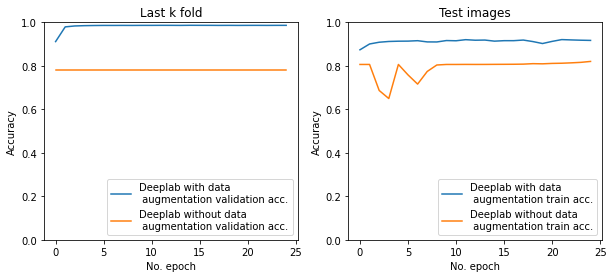

In [ ]:

fig,axs = plt.subplots(1,2,figsize=(10,4))
axs = axs.flatten()
axs[0].plot(history_deeplab.history['val_accuracy']) #with augmentation
axs[0].plot(history_woa.history['val_accuracy']) #without augmentation
axs[0].set_ylim([0, 1])
axs[0].set_title("Last k fold")
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('No. epoch')
axs[0].legend(["Deeplab with data \n augmentation validation acc.", "Deeplab without data \n augmentation validation acc."], loc ="lower right")

axs[1].plot(history_deeplab_test.history['val_accuracy'])
axs[1].plot(history_deeplab_woa_test.history['val_accuracy'])
axs[1].set_title("Test images")
axs[1].set_ylim([0, 1])
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('No. epoch')
axs[1].legend(["Deeplab with data \n augmentation train acc.", "Deeplab without data \n augmentation train acc."], loc ="lower right")

#plt.savefig("Deeplab_accuracy_combined.png")

plt.show()

The model performance peaks at aronud the 15th epoch while using the augmented data which points towards room for reduction in training time. Following plots compare the predicted mask by DeepLabv3+ when trained on real and augmented vs only real images. 

1/1 [==============================] - 0s 38ms/step


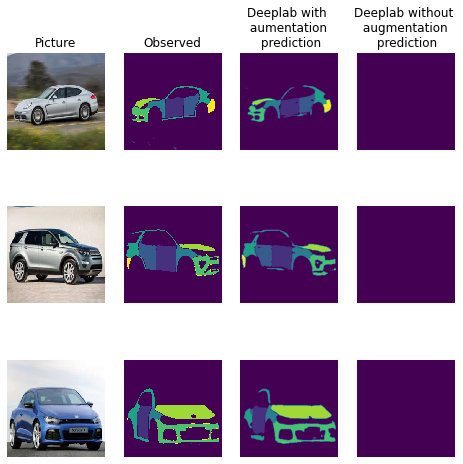

In [ ]:
y_pred_deeplab = model_deeplab.predict(x_test)
y_pred1_deeplab = np.argmax(y_pred_deeplab,axis=3)
y_pred_deeplab_woa = model_deeplab_woa.predict(x_test)
y_pred1_deeplab_woa = np.argmax(y_pred_deeplab_woa,axis=3)

fig,axs = plt.subplots(3,4,figsize=(8,8))
axs = axs.flatten()
axs[0].imshow(x_test[0],interpolation='nearest')
axs[0].set_title("Picture")
axs[0].axis('off')
axs[1].imshow(y_test[0,:,:],interpolation='nearest')
axs[1].set_title("Observed")
axs[1].axis('off')
axs[2].imshow(y_pred1_deeplab[0,:,:])
axs[2].set_title("Deeplab with \n aumentation \n prediction")
axs[2].axis('off')
axs[3].imshow(y_pred1_deeplab_woa[0,:,:])
axs[3].set_title("Deeplab without \n augmentation \n prediction")
axs[3].axis('off')

axs[4].imshow(x_test[5],interpolation='nearest')
axs[4].axis('off')
axs[5].imshow(y_test[5,:,:],interpolation='nearest')
axs[5].axis('off')
axs[6].imshow(y_pred1_deeplab[5,:,:])
axs[6].axis('off')
axs[7].imshow(y_pred1_deeplab_woa[5,:,:])
axs[7].axis('off')

axs[8].imshow(x_test[4],interpolation='nearest')
axs[8].axis('off')
axs[9].imshow(y_test[4,:,:],interpolation='nearest')
axs[9].axis('off')
axs[10].imshow(y_pred1_deeplab[4,:,:])
axs[10].axis('off')
axs[11].imshow(y_pred1_deeplab_woa[4,:,:])
axs[11].axis('off')


#plt.savefig("Deeplab_mask.png")
plt.axis('off')
plt.show()

Figure demonstrates the observed and predicted class masks for the DeepLabv3+ model with training data excluding and including augmentation. The class mask predicted by the model trained exclusively on the real images appears to only have the background. This points to the poor performance of the model and therefore classifies almost every pixel as a background pixel. The model that is trained on the image-augmented dataset, on the other hand, has produced a much improved segmented mask

# Analysis of the models

In this sections differnt plots were created in order to compare the differnt models that were created previously. 

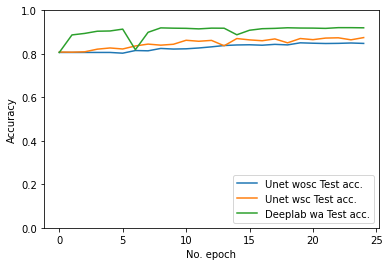

In [ ]:
plt.plot(history_cnn_test.history['val_accuracy'])
plt.plot(history_vgg_test.history['val_accuracy'])
plt.plot(history_deeplab_test.history['val_accuracy'])
# plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.ylim([0, 1])
plt.legend(["Unet wosc Test acc.", "Unet wsc Test acc.", "Deeplab wa Test acc."], loc ="lower right")
#plt.savefig("Modeel_comparison_accuray.png")
plt.show()

Here the accuracy for each of the models for each epoch is shown. The accuracy is for the test dataset. In the legend, 'wosc' is for 'without skip connection' and 'wsc' is for 'with skip connection'. The graph shows that the deeplap is outperforming the other models in terms of accuracy, however not by a lot. This is, due to the class imbalance and why F1 score is the arbiter that determined which model is performing best

# Conclusion 
The problem of semantic segmentation can be addressed by way of capturing low level details about the objects and the spatial information i.e. where they lie in the image. This information is crucial for the model for accurate or near-accurate reconstruction of the image. In spite of capturing the spatial information ,the U-Net architecture falls short as it lacks the field of view that Spatial Pyramid Pooling introduces in the DeepLabv3+ architecture. The U-Net without skip connections further demonstrates the importance of exchange of information between the encoder and decoder layers. Further, the interpolation method chosen contributes towards reconstruction abilities of the model.

# Appendix 

This section includes extra plots that were created and are currently part of the poster

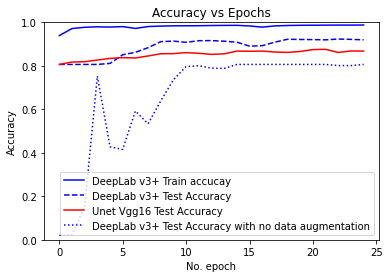

In [ ]:
# Plot history: Accuracy
plt.plot(history.history['accuracy'],"b-")
plt.plot(history.history['val_accuracy'],"b--",)
plt.plot(history_vgg.history['val_accuracy'],"r")
plt.plot(history_no_augmentation.history['val_accuracy'],"b:")
# plt.title('Comparing models')
plt.ylabel('Accuracy')
plt.xlabel('No. epochs')
plt.ylim([0, 1])
plt.legend(["DeepLab v3+ Train acc.", "DeepLab v3+ Test acc.", "Unet Vgg16 Test acc.", "DeepLab v3+ Test acc. with no data augmentation"], loc ="lower right")
#plt.savefig("All_Accuracies_blue.png")
plt.show()

1/1 [==============================] - 0s 34ms/step


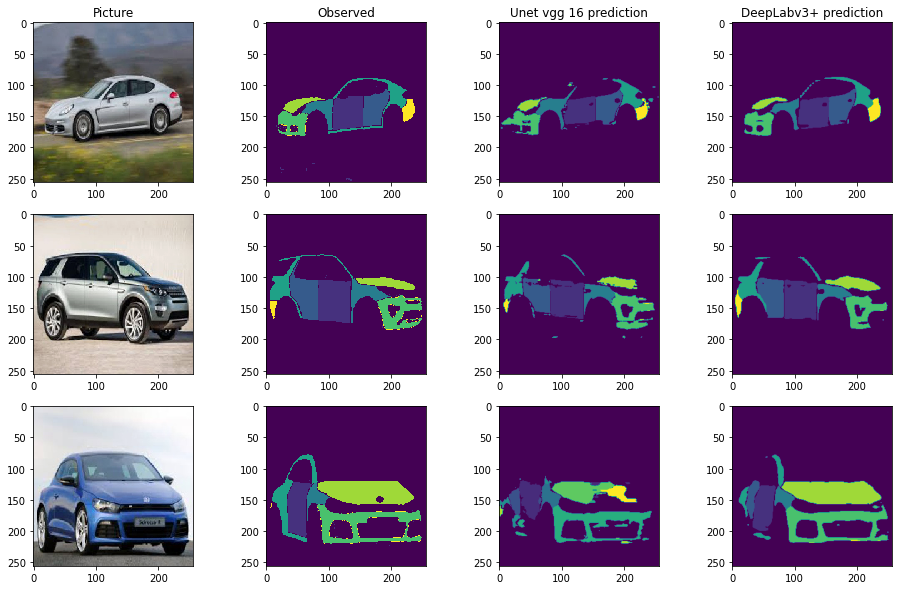

In [ ]:
# CNN predictions 
y_pred_cnn = model_cnn.predict(x_test)
y_pred1_cnn = np.argmax(y_pred_cnn,axis=3)
#Unet predictions
y_pred_vgg = model_vgg(x_test)
y_pred1_vgg = np.argmax(y_pred_vgg,axis=3)
# deeplab predictions 
y_pred1_deeplab = np.argmax(y_pred_deeplab,axis=3)
y_pred_deeplab = model.predict(x_test)

fig,axs = plt.subplots(3,5,figsize=(16,10))
axs = axs.flatten()
axs[0].imshow(x_test[0],interpolation='nearest')
axs[0].set_title("Picture")
axs[1].imshow(y_test[0,:,:],interpolation='nearest')
axs[1].set_title("Observed")
axs[2].imshow(y_pred1_cnn[0,:,:])
axs[2].set_title("CNN prediction")
axs[3].imshow(y_pred1_vgg[0,:,:])
axs[3].set_title("Unet vgg 16 prediction")
axs[4].imshow(y_pred1_deeplab[0,:,:])
axs[4].set_title("DeepLabv3+ prediction")

axs[5].imshow(x_test[5],interpolation='nearest')
axs[6].imshow(y_test[5,:,:],interpolation='nearest')
axs[7].imshow(y_pred1_cnn[5,:,:])
axs[8].imshow(y_pred1_vgg[5,:,:])
axs[9].imshow(y_pred1_deeplab[5,:,:])


axs[10].imshow(x_test[4],interpolation='nearest')
axs[11].imshow(y_test[4,:,:],interpolation='nearest')
axs[12].imshow(y_pred1_cnn[4,:,:])
axs[13].imshow(y_pred1_vgg[4,:,:])
axs[14].imshow(y_pred1_deeplab[4,:,:])


#plt.savefig("mask.png")
plt.show()